# Predict Loan Eligibility for Dream Housing Finance company

# Dataset Link : https://www.kaggle.com/ajaymanwani/loan-approval-prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [3]:
df=pd.read_csv("/content/train_ctrUa4K.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


In [7]:
df.describe

<bound method NDFrame.describe of       Loan_ID  Gender Married  ... Credit_History Property_Area Loan_Status
0    LP001002    Male      No  ...            1.0         Urban           Y
1    LP001003    Male     Yes  ...            1.0         Rural           N
2    LP001005    Male     Yes  ...            1.0         Urban           Y
3    LP001006    Male     Yes  ...            1.0         Urban           Y
4    LP001008    Male      No  ...            1.0         Urban           Y
..        ...     ...     ...  ...            ...           ...         ...
609  LP002978  Female      No  ...            1.0         Rural           Y
610  LP002979    Male     Yes  ...            1.0         Rural           Y
611  LP002983    Male     Yes  ...            1.0         Urban           Y
612  LP002984    Male     Yes  ...            1.0         Urban           Y
613  LP002990  Female      No  ...            0.0     Semiurban           N

[614 rows x 13 columns]>

In [11]:
a= df['Property_Area'].values
a

array(['Urban', 'Rural', 'Urban', 'Urban', 'Urban', 'Urban', 'Urban',
       'Semiurban', 'Urban', 'Semiurban', 'Urban', 'Urban', 'Urban',
       'Rural', 'Urban', 'Urban', 'Urban', 'Urban', 'Rural', 'Urban',
       'Urban', 'Urban', 'Semiurban', 'Rural', 'Semiurban', 'Semiurban',
       'Semiurban', 'Urban', 'Urban', 'Semiurban', 'Urban', 'Urban',
       'Rural', 'Semiurban', 'Rural', 'Urban', 'Urban', 'Semiurban',
       'Urban', 'Semiurban', 'Urban', 'Urban', 'Urban', 'Semiurban',
       'Urban', 'Urban', 'Urban', 'Urban', 'Urban', 'Semiurban',
       'Semiurban', 'Semiurban', 'Semiurban', 'Urban', 'Urban',
       'Semiurban', 'Semiurban', 'Rural', 'Urban', 'Urban', 'Urban',
       'Urban', 'Rural', 'Rural', 'Semiurban', 'Semiurban', 'Urban',
       'Urban', 'Urban', 'Semiurban', 'Urban', 'Semiurban', 'Semiurban',
       'Semiurban', 'Semiurban', 'Urban', 'Urban', 'Urban', 'Semiurban',
       'Semiurban', 'Semiurban', 'Semiurban', 'Urban', 'Semiurban',
       'Urban', 'Semiurban', '

In [15]:
df.isna()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
df.dropna()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [16]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
from sklearn.preprocessing import LabelEncoder

In [21]:
le=LabelEncoder()
df.Property_Area=le.fit_transform(df.Property_Area)
df.Property_Area

0      2
1      0
2      2
3      2
4      2
      ..
609    0
610    0
611    2
612    2
613    1
Name: Property_Area, Length: 614, dtype: int64

In [24]:
df.Loan_Status=le.fit_transform(df.Loan_Status)
print(df.Loan_Status)

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64


In [25]:
new_df=df.replace(np.NAN,{'LoanAmount':100,'Loan_Amount_Term':360.0,'Credit_History':1.0})
new_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,100.0,360.0,1.0,2,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,2,1


In [27]:
new_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [28]:
new_df.isna()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


In [29]:
new_df.dropna()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,100.0,360.0,1.0,2,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,2,1


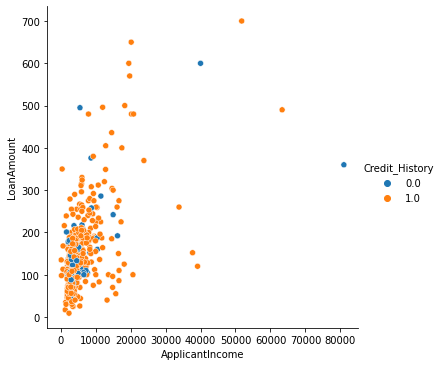

In [34]:
sns.relplot(x='ApplicantIncome',y='LoanAmount',hue="Credit_History",data=new_df)

In [36]:
x = new_df.drop(['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Loan_Status'],axis='columns')
x

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,5849,0.0,100.0,360.0,1.0,2
1,4583,1508.0,128.0,360.0,1.0,0
2,3000,0.0,66.0,360.0,1.0,2
3,2583,2358.0,120.0,360.0,1.0,2
4,6000,0.0,141.0,360.0,1.0,2
...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,0
610,4106,0.0,40.0,180.0,1.0,0
611,8072,240.0,253.0,360.0,1.0,2
612,7583,0.0,187.0,360.0,1.0,2


In [38]:
y = new_df['Loan_Status']
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [39]:
from sklearn.model_selection import train_test_split

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

print(x_train)
print(x_test)

     ApplicantIncome  CoapplicantIncome  ...  Credit_History  Property_Area
291             4400                0.0  ...             0.0              1
507             3583                0.0  ...             1.0              2
328             4333             2451.0  ...             1.0              2
609             2900                0.0  ...             1.0              0
69              4300                0.0  ...             0.0              1
..               ...                ...  ...             ...            ...
129             6080             2569.0  ...             1.0              0
144            11757                0.0  ...             1.0              2
72              3500                0.0  ...             1.0              1
235             5500             1260.0  ...             1.0              0
37              3667             1459.0  ...             1.0              1

[491 rows x 6 columns]
     ApplicantIncome  CoapplicantIncome  ...  Credit_History  Pr

In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
clf = DecisionTreeClassifier(random_state=5)
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=5, splitter='best')

In [63]:
y_pred = clf.predict(x_test)
y_pred

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1])

In [64]:
from sklearn.metrics import accuracy_score

In [65]:
acc = accuracy_score(y_test,y_pred)
print("Accuracy is ", acc*100,'%')

Accuracy is  72.35772357723577 %


In [66]:
from sklearn.metrics import confusion_matrix

In [67]:
cm = np.array(confusion_matrix(y_test,y_pred))
cm

array([[22, 17],
       [17, 67]])

In [68]:
from sklearn import tree

[Text(107.90289322250639, 212.004, 'X[4] <= 0.5\ngini = 0.429\nsamples = 491\nvalue = [153, 338]'),
 Text(29.11304347826087, 201.132, 'X[2] <= 547.5\ngini = 0.153\nsamples = 72\nvalue = [66, 6]'),
 Text(25.687979539641944, 190.26, 'X[1] <= 8115.0\ngini = 0.131\nsamples = 71\nvalue = [66, 5]'),
 Text(17.125319693094628, 179.388, 'X[2] <= 129.0\ngini = 0.109\nsamples = 69\nvalue = [65, 4]'),
 Text(10.275191815856777, 168.516, 'X[3] <= 240.0\ngini = 0.049\nsamples = 40\nvalue = [39, 1]'),
 Text(6.850127877237852, 157.644, 'X[1] <= 2065.0\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(3.425063938618926, 146.772, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(10.275191815856777, 146.772, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(13.700255754475704, 157.644, 'gini = 0.0\nsamples = 36\nvalue = [36, 0]'),
 Text(23.97544757033248, 168.516, 'X[2] <= 131.0\ngini = 0.185\nsamples = 29\nvalue = [26, 3]'),
 Text(20.550383631713554, 157.644, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),

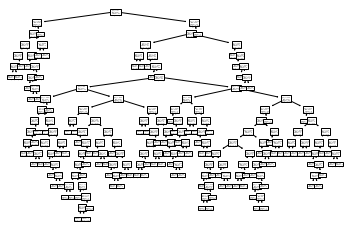

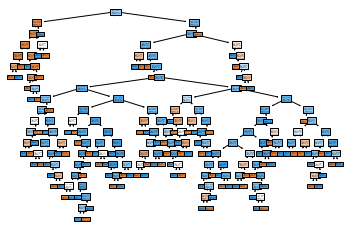

In [72]:
tree.plot_tree(clf)
plt.figure()
tree.plot_tree(clf,filled=True)  

In [70]:
plt.savefig('tree.jpg',format='jpg',bbox_inches = "tight")

<Figure size 432x288 with 0 Axes>

# EXIT